# Gradient Descent

Linear Regression can be enhanced with the use of the Gradient Descent algorithm.

By applying the Gradient Descent algorithm, we can optimize the theta parameters (weights) of our Linear Regression algorithm to improve its performance. This involves iteratively minimizing our cost function using small steps until we reach the optimal parameters.

<img src="../../../assets/gradient_descent_example.png" style="display: block; margin-left: auto; margin-right: auto">

To find the optimal parameters, we need to find the **gradient** (derivatives) of our cost function with respect to each parameter. We can then use these gradients to update our parameters.

* $ J:= \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 \rightarrow$ Cost Function

* $ h_{\theta}(x^{(i)}) = \theta_0 + \theta_1 x^{(i)} \rightarrow$ Linear Regression Model

* $ \frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) \rightarrow$ First Derivative

* $ \frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)} \rightarrow$ Second Derivative

We can then use these derivatives to update our parameters:

* $ \theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0} \rightarrow \text{Update } \theta_0$

* $ \theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1} \rightarrow \text{Update } \theta_1$

  * $ \alpha \rightarrow$ Learning Rate

We can then repeat this process until we reach the optimal parameters (minimum of the Cost Function).

The **Gradient Descent** algorithm is a very powerful optimization algorithm that can be used to optimize many different machine learning and deep learning algorithms.

## Implementation

In [38]:
import numpy as np

class GradientDescent:
    '''
    Linear Regression using Gradient Descent

    Attributes:
        learning_rate (float): - how fast the model learns
        epochs (int): - number of iterations to perform gradient descent
        weights (ndarray): - weights of the model
        bias (float): - bias of the model
    
    Methods:
        fit(X: np.ndarray, y: np.ndarray) -> None: - trains the model using the given data X and target y using gradient descent
        predict(X: np.ndarray) -> np.ndarray: - predicts the value of X using the trained model
        evaluate(X: np.ndarray, y: np.ndarray, metric: str = 'mse') -> float: - evaluates the model using the specified metric
        plot(X: np.ndarray, y: np.ndarray) -> None: - plots the input data and the predicted values using matplotlib
    '''
    def __init__(self, learning_rate: float = 0.01, epochs: int = 1000) -> None:
        self.learning_rate = learning_rate 
        self.epochs = epochs              
        self.weights = None
        self.bias = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        '''
        Trains the model using the given data X and target y using gradient descent
        
        Args:
            X (ndarray): - input data
            y (ndarray): - target data
        '''
        # Number of samples and features
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias   # Predicted value
            diff = (y_predicted - y)                            # Difference between predicted and actual value

            # Calculate gradients
            dw = np.dot(X.T, diff) / num_samples
            db = np.sum(diff) / num_samples

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Predicts the value of X using the trained model

        Args:
            X (ndarray): - input data

        Returns:
            ndarray: - predicted values
        '''
        return np.dot(X, self.weights) + self.bias

    def evaluate(self, X: np.ndarray, y: np.ndarray, metric: str = 'mse') -> float:
        '''
        Evaluates the model using the specified metric

        Args:
            X (ndarray): - input data
            y (ndarray): - target data
            metric (str): - metric to evaluate the model
        
        Returns:
            float: - value of the specified metric
        '''
        if metric == 'mse':
            return np.sum((self.predict(X) - y)**2) / len(y)                            # MSE (Mean Squared Error)
        elif metric == 'mae':
            return np.sum(np.abs(self.predict(X) - y)) / len(y)                         # MAE (Mean Absolute Error)
        elif metric == 'r2_score':
            return 1 - (np.sum((y - self.predict(X))**2) / np.sum((y - np.mean(y))**2)) # R2 Score
        else:
            raise ValueError('Invalid metric')
        
    def plot(self, X: np.ndarray, y: np.ndarray) -> None:
        '''
        Plots the input data and the predicted values using matplotlib

        Args:
            X (ndarray): - input data
            y (ndarray): - target data
        '''
        import matplotlib.pyplot as plt
        y_predicted = self.predict(X)
        plt.rcParams['figure.figsize'] = [6, 4]
        plt.scatter(X, y, color='blue')
        plt.plot(X, y_predicted, color='red')
        plt.show()

    def __str__(self):
        return f'GradientDescent: learning_rate={self.learning_rate} | epochs={self.epochs} | weights={self.weights} | bias={self.bias}'

## Dataset

We will use custom dataset for this example. The dataset contains 30 examples and 2 columns: Years of Experience and Salary. We will use Years of Experience to predict Salary.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dataset of 30 employees with their years of experience and salary
df = pd.DataFrame({
    'YearsExperience': [1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8, 7.1, 7.9, 8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5], 
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
    })

X = df['YearsExperience'].values
y = df['Salary'].values

## Train and Test

Epochs : 1
GradientDescent: learning_rate=0.01 | epochs=1 | weights=[4358.70820833] | bias=738.8620833333333
Loss MSE: 3495772374.8947663
R2 Score : -2.2250916631441626


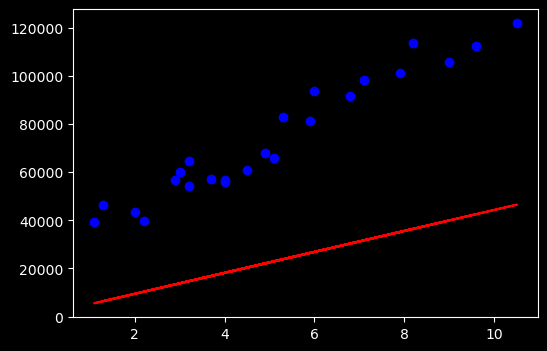

--------------------------
Epochs : 10
GradientDescent: learning_rate=0.01 | epochs=10 | weights=[12892.71910419] | bias=2540.6118705282397
Loss MSE: 103733922.6115523
R2 Score : 0.904298285722957


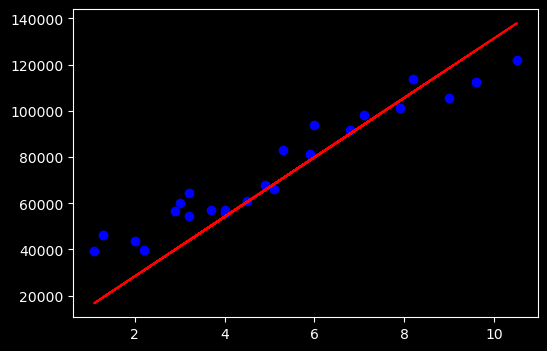

--------------------------
Epochs : 100
GradientDescent: learning_rate=0.01 | epochs=100 | weights=[12496.57788023] | bias=6601.90858241139
Loss MSE: 81255794.37418288
R2 Score : 0.9250359128356513


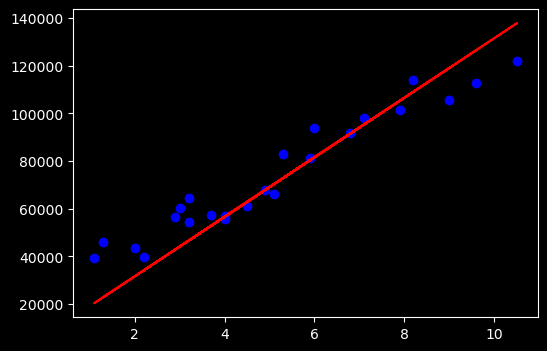

--------------------------
Epochs : 1000
GradientDescent: learning_rate=0.01 | epochs=1000 | weights=[9829.36837221] | bias=23504.991244342833
Loss MSE: 8852482.507512258
R2 Score : 0.9918329729538049


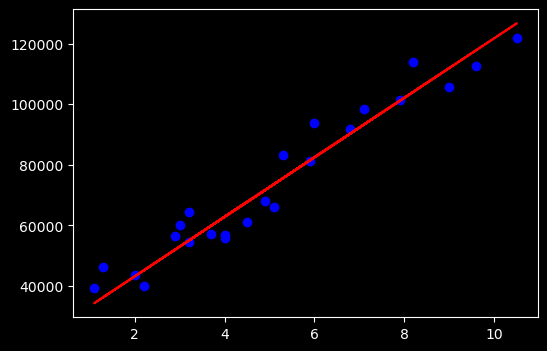

--------------------------
Epochs : 10000
GradientDescent: learning_rate=0.01 | epochs=10000 | weights=[9312.57513329] | bias=26780.09910906973
Loss MSE: 12823412.210667096
R2 Score : 0.9881695158098134


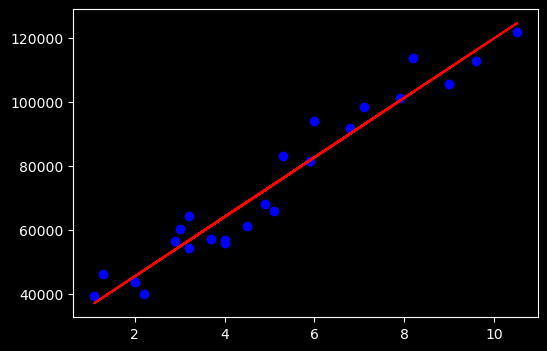

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

y_pred = None

diff_epochs = [1, 10, 100, 1000, 10000]

for i, epochs in enumerate(diff_epochs):
    model = GradientDescent(learning_rate=0.01, epochs=epochs)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'Epochs : {epochs}')
    print(model)
    print(f'Loss MSE: {model.evaluate(X_test, y_test, metric="mse")}')
    print(f'R2 Score : {model.evaluate(X_test, y_test, metric="r2_score")}')
    model.plot(X_train, y_train)
    if i != len(diff_epochs) - 1:
        print('--------------------------')

## Comparision to Scikit-learn

In [45]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Sklearn Linear Regression')
print(f'Loss MSE: {np.sum((y_pred - y_test)**2) / len(y_test)}')
print(f'R2 Score : {1 - (np.sum((y_test - y_pred)**2)) / np.sum((y_test - np.mean(y_test))**2)}')

print('--------------------------')

print('My model')
print(f'Loss MSE: {model.evaluate(X_test, y_test, metric="mse")}')
print(f'R2 Score : {model.evaluate(X_test, y_test, metric="r2_score")}')

print('--------------------------')

print(f'Difference in Loss MSE: {np.sum((y_pred - y_test)**2) / len(y_test) - model.evaluate(X_test, y_test, metric="mse")}')
print(f'Difference in R2 Score : {1 - (np.sum((y_test - y_pred)**2)) / np.sum((y_test - np.mean(y_test))**2) - model.evaluate(X_test, y_test, metric="r2_score")}')


Sklearn Linear Regression
Loss MSE: 12823412.298126549
R2 Score : 0.988169515729126
--------------------------
My model
Loss MSE: 12823412.210667096
R2 Score : 0.9881695158098134
--------------------------
Difference in Loss MSE: 0.08745945245027542
Difference in R2 Score : -8.068734569377511e-11
